In [47]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine


In [48]:
from sqlalchemy import create_engine

engine = create_engine(
    "mysql+pymysql://root@localhost:3306/tess"
)


In [49]:
query = """
SELECT
    l.State AS State,
    d.Year AS Year,
    SUM(f.UnitsSold) AS TotalUnitsSold
FROM fact_sales f
JOIN dim_date d ON f.DateID = d.DateID
JOIN dim_location l ON f.LocationID = l.LocationID
WHERE d.Year IN (2020, 2021)
GROUP BY l.State, d.Year
"""

df = pd.read_sql(query, engine)
df


,State,Year,TotalUnitsSold
0,Alabama,2021,63327.0
1,Alaska,2021,30815.0
2,Arizona,2021,46919.0
3,Arkansas,2021,48468.0
4,California,2020,23223.0
5,California,2021,139037.0
6,Colorado,2020,41378.0
7,Connecticut,2021,34696.0
8,Delaware,2021,30275.0
9,Florida,2020,62405.0


In [50]:
top3_state = (
    df[df['Year'] == 2021]
    .sort_values(by='TotalUnitsSold', ascending=False)
    .head(3)['State']
)

top3_state


5     California
47         Texas
45     Tennessee
Name: State, dtype: object

In [51]:
df_top3 = df[df['State'].isin(top3_state)]
df_top3


,State,Year,TotalUnitsSold
4,California,2020,23223.0
5,California,2021,139037.0
45,Tennessee,2021,66077.0
46,Texas,2020,87125.0
47,Texas,2021,69178.0


In [52]:
pivot_df = df_top3.pivot(
    index='State',
    columns='Year',
    values='TotalUnitsSold'
).reset_index()

pivot_df


Year,State,2020,2021
0,California,23223.0,139037.0
1,Tennessee,NaN,66077.0
2,Texas,87125.0,69178.0


In [53]:
pivot_df['GrowthPercentage'] = (
    (pivot_df[2021] - pivot_df[2020]) / pivot_df[2020]
) * 100

pivot_df['KPI_Status'] = pivot_df['GrowthPercentage'].apply(
    lambda x: 'Tercapai' if x >= 10 else 'Tidak Tercapai'
)

pivot_df


Year,State,2020,2021,GrowthPercentage,KPI_Status
0,California,23223.0,139037.0,498.703871,Tercapai
1,Tennessee,NaN,66077.0,NaN,Tidak Tercapai
2,Texas,87125.0,69178.0,-20.599139,Tidak Tercapai


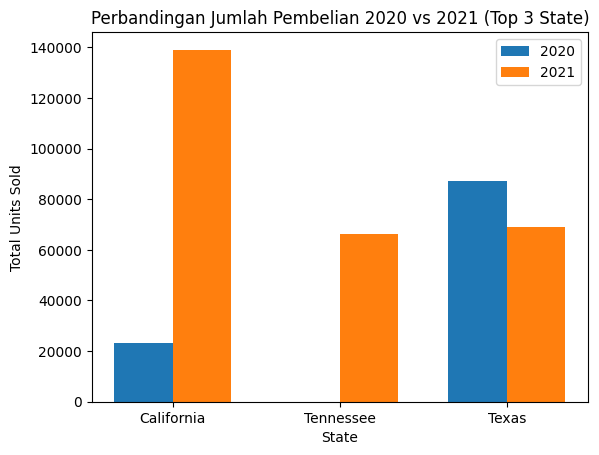

In [54]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(pivot_df['State']))
width = 0.35

plt.figure()
plt.bar(x - width/2, pivot_df[2020], width, label='2020')
plt.bar(x + width/2, pivot_df[2021], width, label='2021')

plt.xticks(x, pivot_df['State'])
plt.xlabel('State')
plt.ylabel('Total Units Sold')
plt.title('Perbandingan Jumlah Pembelian 2020 vs 2021 (Top 3 State)')
plt.legend()
plt.show()


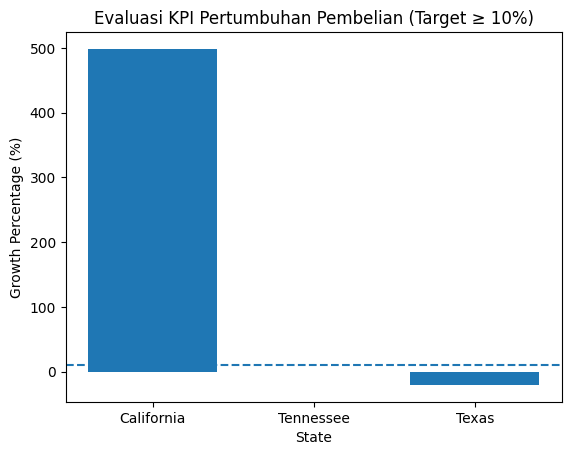

In [55]:
plt.figure()
plt.bar(pivot_df['State'], pivot_df['GrowthPercentage'])
plt.axhline(y=10, linestyle='--')
plt.xlabel('State')
plt.ylabel('Growth Percentage (%)')
plt.title('Evaluasi KPI Pertumbuhan Pembelian (Target ≥ 10%)')
plt.show()
